## Analysis Starts here

In [1]:
import pandas as pd
path = "Jan3_2022_Pred/21DayWin_7DayPred/"
x_train = pd.read_csv(path+"x_train.csv",index_col=0)
y_train = pd.read_csv(path+"y_train.csv",index_col=0)

x_val = pd.read_csv(path+"x_val.csv",index_col=0)
y_val = pd.read_csv(path+"y_val.csv",index_col=0)

x_test = pd.read_csv(path+"x_test.csv",index_col=0)
y_test = pd.read_csv(path+"y_test.csv",index_col=0)

### Training Model for only Cases Prediction

In [2]:
y_train = y_train.iloc[:,[1,3,5,7,9,11,13]]
y_val = y_val.iloc[:,[1,3,5,7,9,11,13]]
y_test = y_test.iloc[:,[1,3,5,7,9,11,13]]

In [3]:
y_train

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2020-04-26,-1.020043,-1.017310,-1.017571,-1.015028,-1.016160,-1.009215,-1.007637
2020-04-27,-1.017310,-1.017571,-1.015028,-1.016160,-1.009215,-1.007637,-1.004158
2020-04-28,-1.017571,-1.015028,-1.016160,-1.009215,-1.007637,-1.004158,-1.001529
2020-04-29,-1.015028,-1.016160,-1.009215,-1.007637,-1.004158,-1.001529,-0.999039
2020-04-30,-1.016160,-1.009215,-1.007637,-1.004158,-1.001529,-0.999039,-0.999226
...,...,...,...,...,...,...,...
2021-08-27,1.252444,1.293391,1.336629,1.378909,1.438982,1.489022,1.514540
2021-08-28,1.293391,1.336629,1.378909,1.438982,1.489022,1.514540,1.551361
2021-08-29,1.336629,1.378909,1.438982,1.489022,1.514540,1.551361,1.551055


In [4]:
x_test.columns

Index(['actuals.cases(t-21)', 'actuals.deaths(t-21)',
       'metrics.deathDensity(t-21)', 'metrics.caseDensity(t-21)',
       'metrics.testPositivityRatio(t-21)', 'cdcTransmissionLevel(t-21)',
       'riskLevels.caseDensity(t-21)', 'riskLevels.overall(t-21)',
       'metrics.vaccinationsCompletedRatio(t-21)',
       'metrics.vaccinationsInitiatedRatio(t-21)',
       ...
       'actuals.cases(t-1)', 'actuals.deaths(t-1)',
       'metrics.deathDensity(t-1)', 'metrics.caseDensity(t-1)',
       'metrics.testPositivityRatio(t-1)', 'cdcTransmissionLevel(t-1)',
       'riskLevels.caseDensity(t-1)', 'riskLevels.overall(t-1)',
       'metrics.vaccinationsCompletedRatio(t-1)',
       'metrics.vaccinationsInitiatedRatio(t-1)'],
      dtype='object', length=210)

In [5]:
## RESHAPE
def reshape_data(data, timesteps=1):

    #reshape input to be 3D [samples, timesteps, features]
    np_values = data.values
    new_data = np_values.reshape((np_values.shape[0], timesteps, np_values.shape[1]))
    
    return new_data

X_train= reshape_data(x_train,1)
X_val= reshape_data(x_val,1)
Y_train= reshape_data(y_train,1)
Y_val= reshape_data(y_val,1)

In [6]:
Y_val.shape

(124, 1, 7)

In [7]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Concatenate, LSTM, Dropout, Lambda, Bidirectional
from keras.models import Model
from keras import backend as K #For explicitly adjusting the learning rate
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras import Sequential

# from tensorflow import keras
import tensorflow.keras.backend as K


In [8]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [9]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [10]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_root_mean_squared_error', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-10)

# optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
optimizer = 'adam'

loss_fn = root_mean_squared_error
# loss_fn = 'mse'

model = Sequential()
# model.add(LSTM(128,  activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(128, activation='relu', dropout=0.2), input_shape=(X_train.shape[1],X_train.shape[2])))
# model.add(LSTM(128,  activation='relu', return_sequences=True))
model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.2)) 
model.add(Dense(7)) #Output Variables
model.compile(loss=loss_fn, optimizer=optimizer,metrics = [loss_fn,'mean_squared_error','mean_absolute_percentage_error','mean_absolute_error'])
model.summary()
# fit network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              347136    
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 355,591
Trainable params: 355,591
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=100, batch_size=16,  verbose=1, shuffle=False ,callbacks=[learning_rate_reduction])

Epoch 1/100
31/31 [==============================] - 7s 79ms/step - loss: 0.6620 - root_mean_squared_error: 0.6626 - mean_squared_error: 0.5620 - mean_absolute_percentage_error: 130.4987 - mean_absolute_error: 0.5952 - val_loss: 0.5946 - val_root_mean_squared_error: 0.6344 - val_mean_squared_error: 0.4580 - val_mean_absolute_percentage_error: 126.0529 - val_mean_absolute_error: 0.4548 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - 2s 68ms/step - loss: 0.4572 - root_mean_squared_error: 0.4569 - mean_squared_error: 0.2367 - mean_absolute_percentage_error: 98.7381 - mean_absolute_error: 0.3812 - val_loss: 0.6510 - val_root_mean_squared_error: 0.6698 - val_mean_squared_error: 0.4559 - val_mean_absolute_percentage_error: 198.4889 - val_mean_absolute_error: 0.5561 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - 1s 22ms/step - loss: 0.5933 - root_mean_squared_error: 0.5963 - mean_squared_error: 0.5494 - mean_absolute_percentage_error: 92.4726 - mean_absolu

Epoch 20/100
31/31 [==============================] - 1s 19ms/step - loss: 0.2189 - root_mean_squared_error: 0.2191 - mean_squared_error: 0.0713 - mean_absolute_percentage_error: 77.9231 - mean_absolute_error: 0.1782 - val_loss: 0.4974 - val_root_mean_squared_error: 0.5227 - val_mean_squared_error: 0.3074 - val_mean_absolute_percentage_error: 125.5715 - val_mean_absolute_error: 0.4004 - lr: 1.2500e-04
Epoch 21/100
31/31 [==============================] - 1s 20ms/step - loss: 0.2050 - root_mean_squared_error: 0.2052 - mean_squared_error: 0.0653 - mean_absolute_percentage_error: 75.9099 - mean_absolute_error: 0.1665 - val_loss: 0.5021 - val_root_mean_squared_error: 0.5270 - val_mean_squared_error: 0.3124 - val_mean_absolute_percentage_error: 126.6756 - val_mean_absolute_error: 0.4067 - lr: 1.2500e-04
Epoch 22/100
31/31 [==============================] - ETA: 0s - loss: 0.2010 - root_mean_squared_error: 0.2011 - mean_squared_error: 0.0618 - mean_absolute_percentage_error: 75.4370 - mean_a

Epoch 37/100
30/31 [============================>.] - ETA: 0s - loss: 0.1836 - root_mean_squared_error: 0.1836 - mean_squared_error: 0.0528 - mean_absolute_percentage_error: 74.3662 - mean_absolute_error: 0.1502
Epoch 37: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
31/31 [==============================] - 1s 20ms/step - loss: 0.1847 - root_mean_squared_error: 0.1850 - mean_squared_error: 0.0528 - mean_absolute_percentage_error: 73.0655 - mean_absolute_error: 0.1509 - val_loss: 0.4765 - val_root_mean_squared_error: 0.5031 - val_mean_squared_error: 0.2940 - val_mean_absolute_percentage_error: 114.3889 - val_mean_absolute_error: 0.3816 - lr: 3.9063e-06
Epoch 38/100
31/31 [==============================] - 1s 20ms/step - loss: 0.1861 - root_mean_squared_error: 0.1865 - mean_squared_error: 0.0535 - mean_absolute_percentage_error: 71.8744 - mean_absolute_error: 0.1516 - val_loss: 0.4768 - val_root_mean_squared_error: 0.5034 - val_mean_squared_error: 0.2943 - val_mean_

31/31 [==============================] - 1s 20ms/step - loss: 0.1849 - root_mean_squared_error: 0.1852 - mean_squared_error: 0.0522 - mean_absolute_percentage_error: 73.7485 - mean_absolute_error: 0.1508 - val_loss: 0.4759 - val_root_mean_squared_error: 0.5025 - val_mean_squared_error: 0.2937 - val_mean_absolute_percentage_error: 114.0826 - val_mean_absolute_error: 0.3810 - lr: 6.1035e-08
Epoch 54/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1851 - root_mean_squared_error: 0.1854 - mean_squared_error: 0.0526 - mean_absolute_percentage_error: 73.7282 - mean_absolute_error: 0.1509 - val_loss: 0.4759 - val_root_mean_squared_error: 0.5025 - val_mean_squared_error: 0.2937 - val_mean_absolute_percentage_error: 114.0791 - val_mean_absolute_error: 0.3810 - lr: 6.1035e-08
Epoch 55/100
31/31 [==============================] - ETA: 0s - loss: 0.1851 - root_mean_squared_error: 0.1854 - mean_squared_error: 0.0527 - mean_absolute_percentage_error: 72.4685 - mean_absolute_error

Epoch 70/100
29/31 [===========================>..] - ETA: 0s - loss: 0.1800 - root_mean_squared_error: 0.1800 - mean_squared_error: 0.0508 - mean_absolute_percentage_error: 73.6139 - mean_absolute_error: 0.1473
Epoch 70: ReduceLROnPlateau reducing learning rate to 9.536743617033494e-10.
31/31 [==============================] - 1s 20ms/step - loss: 0.1875 - root_mean_squared_error: 0.1878 - mean_squared_error: 0.0536 - mean_absolute_percentage_error: 74.4862 - mean_absolute_error: 0.1531 - val_loss: 0.4758 - val_root_mean_squared_error: 0.5025 - val_mean_squared_error: 0.2936 - val_mean_absolute_percentage_error: 114.0699 - val_mean_absolute_error: 0.3810 - lr: 1.9073e-09
Epoch 71/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1850 - root_mean_squared_error: 0.1853 - mean_squared_error: 0.0521 - mean_absolute_percentage_error: 71.8757 - mean_absolute_error: 0.1513 - val_loss: 0.4758 - val_root_mean_squared_error: 0.5025 - val_mean_squared_error: 0.2936 - val_mean_a

Epoch 87/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1859 - root_mean_squared_error: 0.1860 - mean_squared_error: 0.0533 - mean_absolute_percentage_error: 72.1127 - mean_absolute_error: 0.1516 - val_loss: 0.4758 - val_root_mean_squared_error: 0.5025 - val_mean_squared_error: 0.2936 - val_mean_absolute_percentage_error: 114.0699 - val_mean_absolute_error: 0.3810 - lr: 1.0000e-10
Epoch 88/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1843 - root_mean_squared_error: 0.1845 - mean_squared_error: 0.0516 - mean_absolute_percentage_error: 70.4248 - mean_absolute_error: 0.1507 - val_loss: 0.4758 - val_root_mean_squared_error: 0.5025 - val_mean_squared_error: 0.2936 - val_mean_absolute_percentage_error: 114.0699 - val_mean_absolute_error: 0.3810 - lr: 1.0000e-10
Epoch 89/100
31/31 [==============================] - 1s 19ms/step - loss: 0.1812 - root_mean_squared_error: 0.1815 - mean_squared_error: 0.0509 - mean_absolute_percentage_error: 70.7893 - m

dict_keys(['loss', 'root_mean_squared_error', 'mean_squared_error', 'mean_absolute_percentage_error', 'mean_absolute_error', 'val_loss', 'val_root_mean_squared_error', 'val_mean_squared_error', 'val_mean_absolute_percentage_error', 'val_mean_absolute_error', 'lr'])


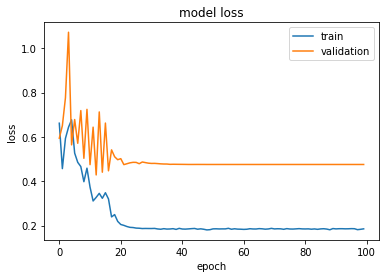

In [12]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [13]:
model.evaluate(X_val,Y_val) #Results from MSE

4/4 [==============================] - 0s 5ms/step - loss: 0.5798 - root_mean_squared_error: 0.5947 - mean_squared_error: 0.4013 - mean_absolute_percentage_error: 140.7270 - mean_absolute_error: 0.4414


[0.5797671675682068,
 0.5947450399398804,
 0.40128833055496216,
 140.7269744873047,
 0.4414207935333252]

In [14]:
model.evaluate(reshape_data(x_test, timesteps=1),reshape_data(y_test, timesteps=1))

1/1 [==============================] - 0s 31ms/step - loss: 2.1757 - root_mean_squared_error: 2.1757 - mean_squared_error: 4.7335 - mean_absolute_percentage_error: 50.5888 - mean_absolute_error: 2.1143


[2.1756699085235596,
 2.1756699085235596,
 4.733539581298828,
 50.58880615234375,
 2.114250421524048]

In [15]:
model.evaluate(X_val,Y_val) 

4/4 [==============================] - 0s 4ms/step - loss: 0.5798 - root_mean_squared_error: 0.5947 - mean_squared_error: 0.4013 - mean_absolute_percentage_error: 140.7270 - mean_absolute_error: 0.4414


[0.5797671675682068,
 0.5947450399398804,
 0.40128833055496216,
 140.7269744873047,
 0.4414207935333252]

In [16]:
model.evaluate(reshape_data(x_test, timesteps=1),reshape_data(y_test, timesteps=1))

1/1 [==============================] - 0s 16ms/step - loss: 2.1757 - root_mean_squared_error: 2.1757 - mean_squared_error: 4.7335 - mean_absolute_percentage_error: 50.5888 - mean_absolute_error: 2.1143


[2.1756699085235596,
 2.1756699085235596,
 4.733539581298828,
 50.58880615234375,
 2.114250421524048]

In [17]:
col = y_test.columns
y_pred = model.predict(reshape_data(x_test, timesteps=1))
y_pred_df=pd.DataFrame()
y_pred_df[col] = y_pred
y_pred_df.index = y_test.index
y_pred_df.head()

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2022-01-03,1.760992,1.661288,1.84661,2.030172,2.246275,2.327744,2.230077


In [18]:
y_test.head()

,metrics.caseDensity(t),metrics.caseDensity(t+1),metrics.caseDensity(t+2),metrics.caseDensity(t+3),metrics.caseDensity(t+4),metrics.caseDensity(t+5),metrics.caseDensity(t+6)
date,,,,,,,
2022-01-03,2.998285,3.382862,3.773047,4.139958,4.579833,4.882025,5.1469


## Rescaling the value and Plotting


In [19]:
import json
file_path = "daily_data_scaling_inforamtion.json"
with open (file_path) as file:
    data = json.load(file)
cases_mean = data['cases_mean']
cases_std = data['cases_std']
cases_mean, cases_std

(87708.1127131783, 69948.04441944878)

In [20]:
def rescaling_cases(df,cases_mean,cases_std):
    rescaled_df = pd.DataFrame()
    for feature in df.columns:
        rescaled_df[[feature]] = (df[[feature]]*cases_std) + cases_mean
    return rescaled_df
        
rescaled_y_test = rescaling_cases(y_test,cases_mean,cases_std)
rescaled_y_pred_df = rescaling_cases(y_pred_df,cases_mean,cases_std)

In [21]:
rescaled_y_pred_df.shape

(1, 7)

In [22]:
rescaled_y_test.shape

(1, 7)

In [23]:
def create_weekly_prediction(df): 
    indices = df.index.tolist()

    results = []
    for index in range(len(indices)):
        if index ==0 or (index+1)%7==0:
            results+=df.loc[indices[index]].tolist()
             
    results = results[0:len(indices)] #Removing the last few indices that are not available for the original data
    new_df = pd.DataFrame()
    new_df.index = df.index        
    new_df['metrics.caseDensity(t)']=results
    
    return new_df

weekly_rescaled_y_test = create_weekly_prediction(rescaled_y_test)
weekly_rescaled_y_pred_df = create_weekly_prediction(rescaled_y_pred_df)

In [24]:
weekly_rescaled_y_test, weekly_rescaled_y_pred_df

(            metrics.caseDensity(t)
 date                              
 2022-01-03                297432.3,
             metrics.caseDensity(t)
 date                              
 2022-01-03             210886.0625)

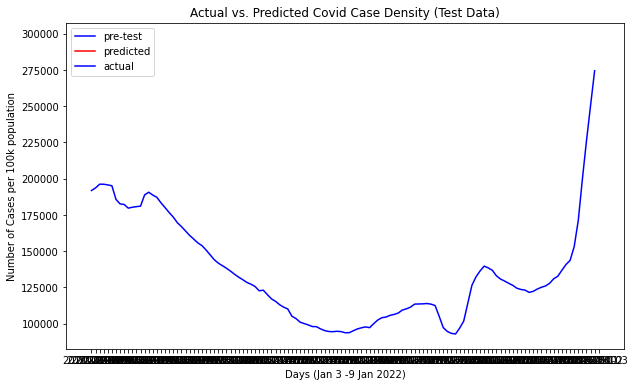

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(rescaling_cases(y_val,cases_mean,cases_std)['metrics.caseDensity(t)'], color='blue')
plt.plot(weekly_rescaled_y_pred_df['metrics.caseDensity(t)'], color='red')
plt.plot(weekly_rescaled_y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population')
plt.xlabel('Days (Jan 3 -9 Jan 2022)')
plt.legend(['pre-test','predicted', 'actual'])

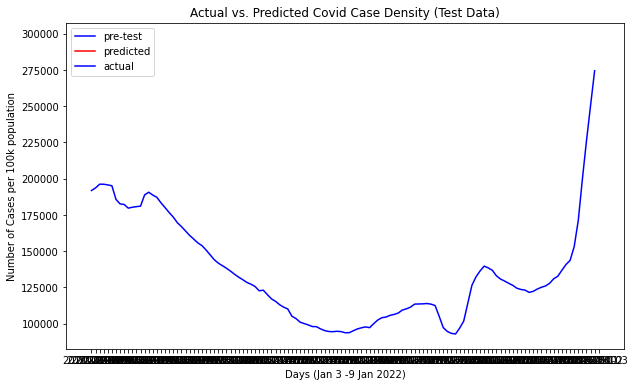

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(rescaling_cases(y_val,cases_mean,cases_std)['metrics.caseDensity(t)'], color='blue')
plt.plot(rescaled_y_pred_df['metrics.caseDensity(t)'], color='red')
plt.plot(rescaled_y_test['metrics.caseDensity(t)'], color='blue')
plt.title('Actual vs. Predicted Covid Case Density (Test Data)')
plt.ylabel('Number of Cases per 100k population')
plt.xlabel('Days (Jan 3 -9 Jan 2022)')
plt.legend(['pre-test','predicted', 'actual'])

In [27]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,6))
# plt.plot(y_pred_df['metrics.deathDensity(t)'], color='red')
# plt.plot(y_test['metrics.deathDensity(t)'], color='blue')
# plt.title('Actual vs. Predicted Covid Death Density (Test Data)')
# plt.ylabel('Deaths/Population (Scaled)')
# plt.xlabel('Days (5 Aug 2021 - 9 Jan 2022)')
# plt.legend(['predicted', 'actual'])